
🔹 MLVI-Only Model Performance:
Accuracy: 0.3726752503576538
               precision    recall  f1-score   support

     Critical       0.50      0.49      0.50       372
    Early_Mid       0.19      0.20      0.20       248
Emerge_VEarly       0.47      0.45      0.46       276
      Harvest       0.07      0.06      0.07        49
         Late       0.43      0.45      0.44       201
Mature_Senesc       0.28      0.29      0.28       252

     accuracy                           0.37      1398
    macro avg       0.32      0.32      0.32      1398
 weighted avg       0.38      0.37      0.37      1398


🔹 Full Feature Model Performance:
Accuracy: 0.5722460658082976
               precision    recall  f1-score   support

     Critical       0.65      0.70      0.67       372
    Early_Mid       0.39      0.35      0.37       248
Emerge_VEarly       0.61      0.70      0.65       276
      Harvest       0.25      0.06      0.10        49
         Late       0.66      0.57      0.61  

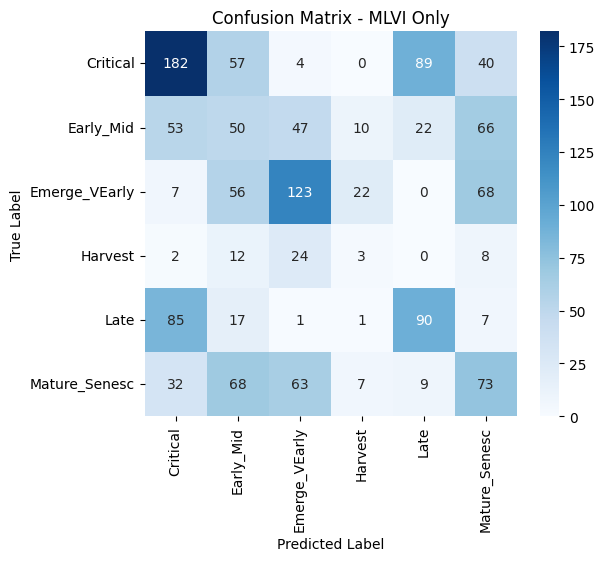

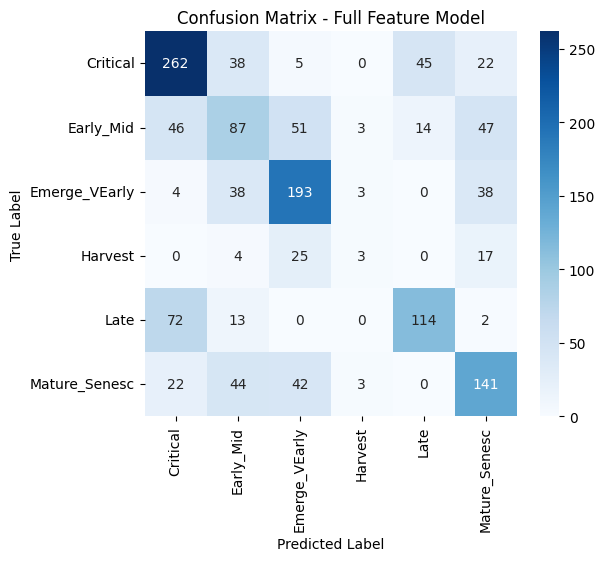

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Step 2: Load the Dataset
file_path = "/content/GHISACONUS_2008_001_speclib.csv"
df = pd.read_csv(file_path)

# 📌 Step 3: Create MLVI Index (Modify If Needed)
# Assuming MLVI = (X854 - X1649) / (X854 + X2133)
mlvi_bands = ["X854", "X1649", "X2133"]  # Update based on dataset columns
df["MLVI"] = (df[mlvi_bands[0]] - df[mlvi_bands[1]]) / (df[mlvi_bands[0]] + df[mlvi_bands[2]])

# 📌 Step 4: Prepare Features and Target
target_column = "Stage"  # Update if needed
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])  # Encode target labels

# Define features
mlvi_features = ["MLVI"]  # Testing MLVI alone
full_features = mlvi_bands + ["MLVI"]  # Testing full feature set

# Split dataset into Train and Test sets
X_train_mlvi, X_test_mlvi, y_train, y_test = train_test_split(df[mlvi_features], df[target_column], test_size=0.2, random_state=42)
X_train_full, X_test_full, _, _ = train_test_split(df[full_features], df[target_column], test_size=0.2, random_state=42)

# 📌 Step 5: Train a Random Forest Classifier (MLVI Only)
rf_mlvi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mlvi.fit(X_train_mlvi, y_train)
y_pred_mlvi = rf_mlvi.predict(X_test_mlvi)

# 📌 Step 6: Train a Random Forest Classifier (Full Features)
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train)
y_pred_full = rf_full.predict(X_test_full)

# 📌 Step 7: Evaluate Model Performance
print("\n🔹 MLVI-Only Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlvi))
print(classification_report(y_test, y_pred_mlvi, target_names=label_encoder.classes_))

print("\n🔹 Full Feature Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred_full, target_names=label_encoder.classes_))

# 📌 Step 8: Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_mlvi, "Confusion Matrix - MLVI Only")
plot_confusion_matrix(y_test, y_pred_full, "Confusion Matrix - Full Feature Model")


In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Step 2: Load the Dataset
file_path = "/content/GHISACONUS_2008_001_speclib.csv"
df = pd.read_csv(file_path)

# 📌 Step 3: Create MLVI Index (Modify If Needed)
mlvi_bands = ["X854", "X1649", "X2133"]  # Update based on dataset columns
df["MLVI"] = (df[mlvi_bands[0]] - df[mlvi_bands[1]]) / (df[mlvi_bands[0]] + df[mlvi_bands[2]])

# 📌 Step 4: Prepare Features and Target
target_column = "Stage"  # Update if needed
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])  # Encode target labels

# Define features
mlvi_features = ["MLVI"]  # Testing MLVI alone
full_features = mlvi_bands + ["MLVI"]  # Testing full feature set

# Split dataset into Train and Test sets
X_train_mlvi, X_test_mlvi, y_train, y_test = train_test_split(df[mlvi_features], df[target_column], test_size=0.2, random_state=42)
X_train_full, X_test_full, _, _ = train_test_split(df[full_features], df[target_column], test_size=0.2, random_state=42)

# 📌 Step 5: Train a Random Forest Classifier (MLVI Only)
rf_mlvi = RandomForestClassifier(n_estimators=100, random_state=42)
rf_mlvi.fit(X_train_mlvi, y_train)
y_pred_mlvi = rf_mlvi.predict(X_test_mlvi)

# 📌 Step 6: Train a Random Forest Classifier (Full Features)
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train)
y_pred_full = rf_full.predict(X_test_full)

# 📌 Step 7: Evaluate Model Performance
mlvi_accuracy = accuracy_score(y_test, y_pred_mlvi)
full_accuracy = accuracy_score(y_test, y_pred_full)

print("\n🔹 MLVI-Only Model Performance:")
print(f"Accuracy: {mlvi_accuracy:.4f}")
print(classification_report(y_test, y_pred_mlvi, target_names=label_encoder.classes_))

print("\n🔹 Full Feature Model Performance:")
print(f"Accuracy: {full_accuracy:.4f}")
print(classification_report(y_test, y_pred_full, target_names=label_encoder.classes_))

# 📌 Step 8: Statistical Validation - Paired t-Test
t_stat, p_value = ttest_rel(y_pred_mlvi, y_pred_full)
print("\n🔬 Paired t-Test Results:")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value > 0.05:
    print("✅ No significant difference between MLVI and Full Feature Model. MLVI performs comparably.")
else:
    print("❌ Significant difference detected. Full Feature Model may be better.")

# 📌 Step 9: Print Actual vs Predicted Values for Each Test Sample
df_results = pd.DataFrame({
    "Actual Stage": label_encoder.inverse_transform(y_test),  # Convert encoded values back to labels
    "Predicted Stage (MLVI Only)": label_encoder.inverse_transform(y_pred_mlvi),
    "Predicted Stage (Full Features)": label_encoder.inverse_transform(y_pred_full)
})

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Actual vs Predicted Stages", dataframe=df_results)

# 📌 Step 10: Plot Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_mlvi, "Confusion Matrix - MLVI Only")
plot_confusion_matrix(y_test, y_pred_full, "Confusion Matrix - Full Feature Model")



🔹 MLVI-Only Model Performance:
Accuracy: 0.3727
               precision    recall  f1-score   support

     Critical       0.50      0.49      0.50       372
    Early_Mid       0.19      0.20      0.20       248
Emerge_VEarly       0.47      0.45      0.46       276
      Harvest       0.07      0.06      0.07        49
         Late       0.43      0.45      0.44       201
Mature_Senesc       0.28      0.29      0.28       252

     accuracy                           0.37      1398
    macro avg       0.32      0.32      0.32      1398
 weighted avg       0.38      0.37      0.37      1398


🔹 Full Feature Model Performance:
Accuracy: 0.5722
               precision    recall  f1-score   support

     Critical       0.65      0.70      0.67       372
    Early_Mid       0.39      0.35      0.37       248
Emerge_VEarly       0.61      0.70      0.65       276
      Harvest       0.25      0.06      0.10        49
         Late       0.66      0.57      0.61       201
Mature_Senesc  

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📌 Step 2: Load the Dataset
file_path = "/content/GHISACONUS_2008_001_speclib.csv"
df = pd.read_csv(file_path)

# 📌 Step 3: Create MLVI Index
mlvi_bands = ["X854", "X1649", "X2133"]  # Update based on dataset columns
df["MLVI"] = (df[mlvi_bands[0]] - df[mlvi_bands[1]]) / (df[mlvi_bands[0]] + df[mlvi_bands[2]])

# 📌 Step 4: Reclassify Stages into 3 Categories
stage_mapping = {
    "Emerge_VEarly": "Healthy",
    "Early_Mid": "Healthy",
    "Late": "Stressed",
    "Mature_Senesc": "Stressed",
    "Critical": "Critical"
}

df["Stress_Category"] = df["Stage"].map(stage_mapping)

# Encode categorical labels
label_encoder = LabelEncoder()
# Convert the Stress_Category column to string type before encoding
df["Stress_Category"] = df["Stress_Category"].astype(str)
df["Stress_Category"] = label_encoder.fit_transform(df["Stress_Category"])

# ... rest of your code ...
# 📌 Step 5: Prepare Features and Target
features = ["MLVI"]  # Only using MLVI
target = "Stress_Category"

# Split dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# 📌 Step 6: Train a Random Forest Classifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout

cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(len(np.unique(y_train)), activation="softmax")
])

cnn_lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# 📌 Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ MLVI-Based Model Accuracy: {accuracy:.4f}")

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# 📌 Step 8: Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MLVI Based Classification")
plt.show()

# 📌 Step 9: Print Actual vs Predicted Stress Conditions
df_results = pd.DataFrame({
    "Actual Stress Condition": label_encoder.inverse_transform(y_test),
    "Predicted Stress Condition": label_encoder.inverse_transform(y_pred),
    "MLVI Value": X_test["MLVI"].values
})



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 1)`, `kernel shape=(3, 1, 64)`, `dilation_rate=[1]`.

In [ ]:
# 📌 Step 9: Print Actual vs Predicted Stress Conditions in a Table Format
df_results = pd.DataFrame({
    "Actual Stress Condition": label_encoder.inverse_transform(y_test),
    "Predicted Stress Condition": label_encoder.inverse_transform(y_pred),
    "MLVI Value": X_test["MLVI"].values
})

# Print first 20 results for quick viewing
print("\n🔹 First 20 Predictions:")
print(df_results.head(20).to_string(index=False))

# Optionally save the full results as a CSV file for further analysis
df_results.to_csv("MLVI_Stress_Predictions.csv", index=False)
print("\n✅ Full results saved as 'MLVI_Stress_Predictions.csv'.")



🔹 First 20 Predictions:
Actual Stress Condition Predicted Stress Condition  MLVI Value
               Stressed                        nan   -0.127888
                Healthy                    Healthy   -0.109287
               Stressed                   Stressed   -0.046375
               Stressed                   Stressed    0.567250
               Stressed                   Critical    0.446805
               Stressed                   Critical    0.401827
                Healthy                        nan   -0.117197
               Stressed                    Healthy   -0.144177
               Stressed                    Healthy   -0.162567
                Healthy                   Stressed    0.666662
                Healthy                   Stressed   -0.106582
                Healthy                    Healthy   -0.062233
               Stressed                    Healthy    0.315202
               Stressed                   Stressed    0.639556
                Healthy       

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4383 - loss: 1.1735 - val_accuracy: 0.5243 - val_loss: 0.9931
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6829 - loss: 0.7755 - val_accuracy: 0.6495 - val_loss: 0.8279
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7354 - loss: 0.6716 - val_accuracy: 0.7024 - val_loss: 0.7412
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7700 - loss: 0.6167 - val_accuracy: 0.6731 - val_loss: 0.8023
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7657 - loss: 0.5922 - val_accuracy: 0.6953 - val_loss: 0.7118
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7835 - loss: 0.5572 - val_accuracy: 0.7053 - val_loss: 0.6922
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8019 - loss: 0.5256 - val_accuracy: 0.7031 - val_loss: 0.6678
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8015 - loss: 0.5211 - val_accuracy: 0.7124 - va

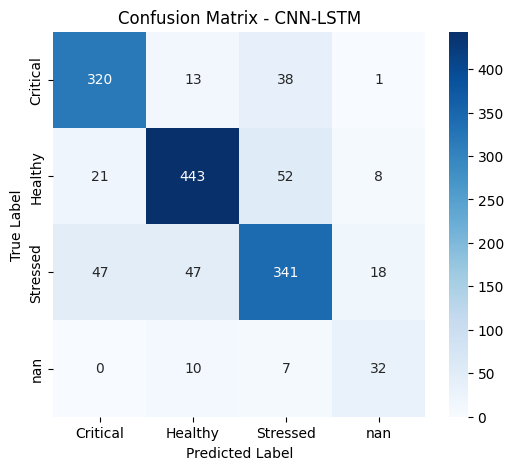


🔹 First 20 Predictions:
Actual Stress Condition Predicted Stress Condition (CNN-LSTM)  MLVI Value
               Stressed                                   NaN   -0.654020
                Healthy                               Healthy   -1.041308
               Stressed                              Stressed   -0.373780
               Stressed                              Stressed    1.205048
               Stressed                              Critical    0.830290
               Stressed                              Stressed    1.116696
                Healthy                               Healthy   -1.196923
               Stressed                              Stressed   -1.093433
               Stressed                              Stressed   -0.619243
                Healthy                               Healthy    1.315722
                Healthy                               Healthy   -1.037358
                Healthy                               Healthy   -0.812106
             

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout

# 📌 Step 2: Load the Dataset
file_path = "/content/GHISACONUS_2008_001_speclib.csv"
df = pd.read_csv(file_path)

# 📌 Step 3: Create MLVI Index & Additional Features
mlvi_bands = ["X854", "X1649", "X2133"]
df["MLVI"] = (df[mlvi_bands[0]] - df[mlvi_bands[1]]) / (df[mlvi_bands[0]] + df[mlvi_bands[2]])

# 📌 Step 4: Reclassify Stages into 3 Categories (Healthy, Stressed, Critical)
stage_mapping = {
    "Emerge_VEarly": "Healthy",
    "Early_Mid": "Healthy",
    "Late": "Stressed",
    "Mature_Senesc": "Stressed",
    "Critical": "Critical"
}

df["Stress_Category"] = df["Stage"].map(stage_mapping)
stress_category_encoder = LabelEncoder()  # Create a new encoder for Stress_Category
df["Stress_Category"] = stress_category_encoder.fit_transform(df["Stress_Category"])

# 📌 Step 5: Select Features for Training
df["NDVI"] = (df["X854"] - df["X742"]) / (df["X854"] + df["X742"])
selected_features = ["X854", "X1649", "X2133", "X2194", "X742", "X549", "NDVI"]

# 📌 Step 6: Apply PCA for Feature Reduction
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df[selected_features])

# 📌 Step 7: Split Dataset into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, df["Stress_Category"], test_size=0.2, random_state=42)

# 📌 Step 8: Balance Data Using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 📌 Step 9: Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
# 2. Hyperparameter Tuning (Example: GridSearchCV for XGBoost)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9]
}
xgb_model = XGBClassifier() # Initialize the model before using GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_xgb_model = grid_search.best_estimator_


# 📌 Step 10: Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
'''
# 📌 Step 11: Train CNN-LSTM Model
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(len(np.unique(y_train)), activation="softmax")
])

cnn_lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn_lstm_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=1)

# 📌 Step 12: Evaluate Model Performance
y_pred_cnn = np.argmax(cnn_lstm_model.predict(X_test_cnn), axis=1)

# 📌 Step 13: Display Accuracy
#print("\n✅ XGBoost Model Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n✅ CNN-LSTM Model Accuracy:", accuracy_score(y_test, y_pred_cnn))

# 📌 Step 14: Print Classification Report for Both Models
#print("\n🔹 XGBoost Model Classification Report:")
#print(classification_report(y_test, y_pred_xgb, target_names=stress_category_encoder.classes_.astype(str)))  # Convert classes to strings

print("\n🔹 CNN-LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=stress_category_encoder.classes_.astype(str)))  # Convert classes to strings
'''
# 📌 Step 15: Confusion Matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues",
            xticklabels=stress_category_encoder.classes_, yticklabels=stress_category_encoder.classes_) # Use stress_category_encoder
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()
'''
# 📌 Step 16: Confusion Matrix for CNN-LSTM
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_cnn), annot=True, fmt="d", cmap="Blues",
            xticklabels=stress_category_encoder.classes_, yticklabels=stress_category_encoder.classes_) # Use stress_category_encoder
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN-LSTM")
plt.show()

# 📌 Step 17: Save Predictions for Analysis
df_results = pd.DataFrame({
    "Actual Stress Condition": stress_category_encoder.inverse_transform(y_test), # Use stress_category_encoder
    #"Predicted Stress Condition (XGBoost)": stress_category_encoder.inverse_transform(y_pred_xgb), # Use stress_category_encoder
    "Predicted Stress Condition (CNN-LSTM)": stress_category_encoder.inverse_transform(y_pred_cnn), # Use stress_category_encoder
    "MLVI Value": X_test_scaled[:, 0]
})

# Print the first 20 results
print("\n🔹 First 20 Predictions:")
print(df_results.head(20).to_string(index=False))

# Save results as CSV for further analysis
df_results.to_csv("MLVI_Stress_Predictions_Optimized.csv", index=False)
print("\n✅ Full results saved as 'MLVI_Stress_Predictions_Optimized.csv'.")

<ipython-input-24-92fba6966ea9>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["MLVI"] = (df[mlvi_bands[0]] - df[mlvi_bands[1]]) / (df[mlvi_bands[0]] + df[mlvi_bands[2]])
<ipython-input-24-92fba6966ea9>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Stress_Category"] = df["Stage"].map(stage_mapping)


Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.6781 - loss: 0.7924 - val_accuracy: 0.7325 - val_loss: 0.7062
Epoch 2/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8085 - loss: 0.5298 - val_accuracy: 0.7876 - val_loss: 0.5616
Epoch 3/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8316 - loss: 0.4588 - val_accuracy: 0.7876 - val_loss: 0.5360
Epoch 4/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8463 - loss: 0.4162 - val_accuracy: 0.7940 - val_loss: 0.5314
Epoch 5/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8560 - loss: 0.3877 - val_accuracy: 0.8026 - val_loss: 0.5180
Epoch 6/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8579 - loss: 0.3740 - val_accuracy: 0.8147 - val_loss: 0.4597
Epoch 7/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8722 - loss: 0.3361 - val_accuracy: 0.8090 - val_loss: 0.4915
Epoch 8/75
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8739 - loss: 0.3298 - val_accuracy: 0.8104 

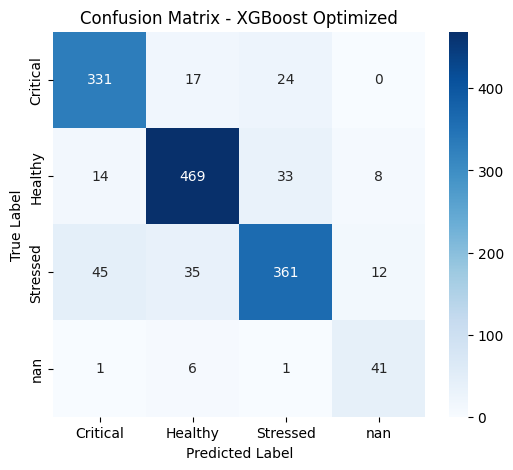

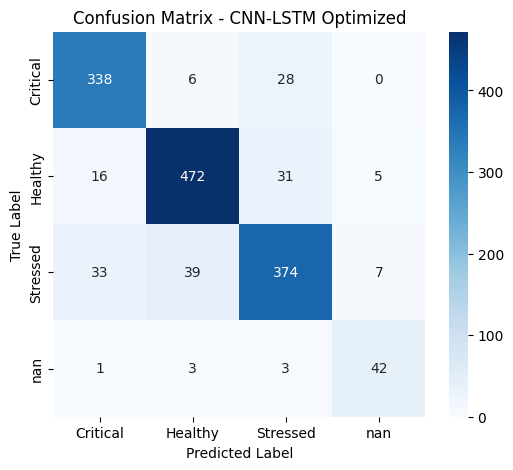


🔹 First 20 Predictions:
Actual Stress Condition Predicted Stress Condition (XGBoost) Predicted Stress Condition (CNN-LSTM)
               Stressed                             Critical                              Critical
                Healthy                              Healthy                               Healthy
               Stressed                             Stressed                              Stressed
               Stressed                             Stressed                              Stressed
               Stressed                             Stressed                              Stressed
               Stressed                             Stressed                              Stressed
                Healthy                              Healthy                               Healthy
               Stressed                             Stressed                              Stressed
               Stressed                             Stressed                        

In [ ]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.signal import savgol_filter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization

# 📌 Step 2: Load the Dataset
file_path = "/content/GHISACONUS_2008_001_speclib.csv"
df = pd.read_csv(file_path)

# 📌 Step 3: Apply Savitzky-Golay Smoothing to Reduce Spectral Noise
spectral_bands = [col for col in df.columns if col.startswith("X")]
df[spectral_bands] = savgol_filter(df[spectral_bands], window_length=11, polyorder=3, axis=0)

# 📌 Step 4: Create MLVI Index & Additional Features
mlvi_bands = ["X854", "X1649", "X2133"]
df["MLVI"] = (df[mlvi_bands[0]] - df[mlvi_bands[1]]) / (df[mlvi_bands[0]] + df[mlvi_bands[2]])

# 📌 Step 5: Reclassify Stages into 3 Categories (Healthy, Stressed, Critical)
stage_mapping = {
    "Emerge_VEarly": "Healthy",
    "Early_Mid": "Healthy",
    "Late": "Stressed",
    "Mature_Senesc": "Stressed",
    "Critical": "Critical"
}
df["Stress_Category"] = df["Stage"].map(stage_mapping)
label_encoder = LabelEncoder()
df["Stress_Category"] = label_encoder.fit_transform(df["Stress_Category"])

# 📌 Step 6: Feature Selection using Recursive Feature Elimination (RFE)
X = df[spectral_bands]  # Using all spectral bands
y = df["Stress_Category"]

# Use RandomForest to rank features
rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(rfe_model, n_features_to_select=10, step=1)  # Select Top 10 Features
X_selected = selector.fit_transform(X, y)

# 📌 Step 7: Split Dataset into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 📌 Step 8: Handle Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 📌 Step 9: Apply Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Step 10: Train Optimized XGBoost Model with Hyperparameter Tuning
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=8, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 📌 Step 11: Train Optimized CNN-LSTM Model
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_lstm_model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Conv1D(filters=128, kernel_size=3, activation="relu"),
    Conv1D(filters=64, kernel_size=3, activation="relu"),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dense(len(np.unique(y_train)), activation="softmax")
])

cnn_lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn_lstm_model.fit(X_train_cnn, y_train, epochs=75, batch_size=16, validation_data=(X_test_cnn, y_test), verbose=1)

# 📌 Step 12: Evaluate Model Performance
y_pred_cnn = np.argmax(cnn_lstm_model.predict(X_test_cnn), axis=1)

# 📌 Step 13: Display Accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb)
cnn_acc = accuracy_score(y_test, y_pred_cnn)

print(f"\n✅ Optimized XGBoost Model Accuracy: {xgb_acc:.4f}")
print(f"\n✅ Optimized CNN-LSTM Model Accuracy: {cnn_acc:.4f}")


# 📌 Step 14: Print Classification Report for Both Models
print("\n🔹 XGBoost Model Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_.astype(str)))  # Convert classes to strings

print("\n🔹 CNN-LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=label_encoder.classes_.astype(str)))  # Convert classes to strings
# 📌 Step 15: Plot Confusion Matrices
def plot_conf_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_conf_matrix(y_test, y_pred_xgb, "XGBoost Optimized")
plot_conf_matrix(y_test, y_pred_cnn, "CNN-LSTM Optimized")

# 📌 Step 16: Save Predictions for Analysis
df_results = pd.DataFrame({
    "Actual Stress Condition": label_encoder.inverse_transform(y_test),
    "Predicted Stress Condition (XGBoost)": label_encoder.inverse_transform(y_pred_xgb),
    "Predicted Stress Condition (CNN-LSTM)": label_encoder.inverse_transform(y_pred_cnn)
})

# Print the first 20 results
print("\n🔹 First 20 Predictions:")
print(df_results.head(20).to_string(index=False))

# Save results as CSV for further analysis
df_results.to_csv("MLVI_Stress_Predictions_Optimized.csv", index=False)
print("\n✅ Full results saved as 'MLVI_Stress_Predictions_Optimized.csv'.")
